In [1]:
from sklearn import datasets
from pandas import DataFrame
noisy_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)
print(noisy_circles)

(array([[ 0.87037634,  0.28598747],
       [-0.80458353,  0.495469  ],
       [-0.21876392, -0.44561098],
       ...,
       [-0.85328394, -0.65695176],
       [ 0.88163428, -0.4419832 ],
       [ 0.32542127, -0.21624688]]), array([0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [2]:
df = DataFrame()
df['x1'] = noisy_circles[0][:,0]
df['x2'] = noisy_circles[0][:,1]
df['label'] = noisy_circles[1]
df.sample(10)

,x1,x2,label
209,0.435357,0.029250,1
496,0.123403,-0.472812,1
519,0.500812,-0.206954,1
295,-0.483525,0.101101,1
71,-0.053801,0.428150,1
781,0.449955,0.285972,1
126,0.072182,-0.468143,1
888,0.371692,-0.373152,1
191,0.399945,0.208088,1
627,-0.141493,0.446726,1


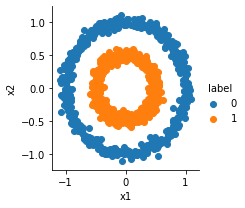

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
g = sns.FacetGrid(df, hue='label')
g.map(plt.scatter, 'x1', 'x2').add_legend()

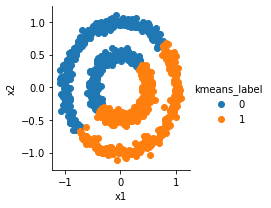

In [5]:
from sklearn.cluster import KMeans
km = KMeans(2)
X = df[['x1', 'x2']]
km.fit(X)
df['kmeans_label'] = km.labels_
g = sns.FacetGrid(df, hue = 'kmeans_label')
g.map(plt.scatter, 'x1', 'x2').add_legend()

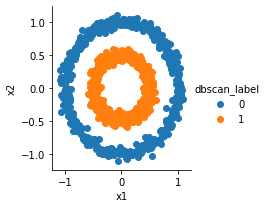

In [13]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
X = df[['x1', 'x2']]
dbscan.fit(X)
df['dbscan_label'] = dbscan.labels_
g = sns.FacetGrid(df, hue='dbscan_label')
g.map(plt.scatter, 'x1', 'x2').add_legend()